In [1]:
import pandas as pd 

In [2]:
import xgboost
import shap

In [3]:
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)


In [4]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

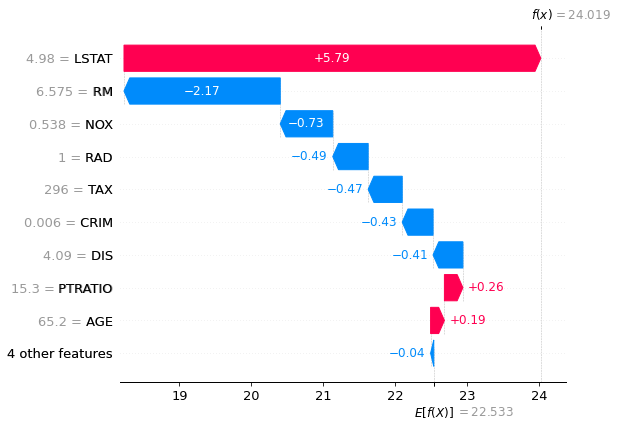

In [5]:
shap.plots.waterfall(shap_values[0])


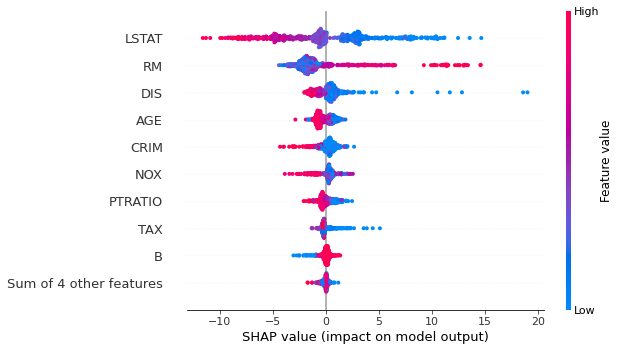

In [6]:
shap.plots.beeswarm(shap_values)


In [7]:
import pandas as pd 

shaps_df = pd.DataFrame(shap_values.values)

In [8]:
shaps_df.columns=['SHAP_' + x for x in X.columns]

In [9]:
shaps_df

,SHAP_CRIM,SHAP_ZN,SHAP_INDUS,SHAP_CHAS,SHAP_NOX,SHAP_RM,SHAP_AGE,SHAP_DIS,SHAP_RAD,SHAP_TAX,SHAP_PTRATIO,SHAP_B,SHAP_LSTAT
0,-0.428502,-0.066637,-0.481867,-0.001530,-0.729227,-2.170028,0.192134,-0.414259,-0.491561,-0.472966,0.256695,-0.053907,5.788325
1,-0.159478,-0.039209,-0.227837,-0.000803,0.180373,-1.750252,-0.246799,-0.948719,-0.091274,0.210134,0.460189,0.001291,1.547877
2,-0.062259,-0.039241,-0.270554,-0.002156,0.627054,3.956776,0.289584,-0.936786,-0.065633,0.409528,0.036114,0.209845,7.915174
3,0.252239,-0.007029,0.252571,-0.003503,0.543809,1.614911,0.197332,-1.169711,-0.060547,1.086732,-0.138008,0.192880,8.041687
4,0.642628,-0.005839,0.277436,-0.006831,0.367894,4.457727,0.441548,-0.360033,-0.049200,2.044360,-0.134221,0.256531,5.662515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.311293,-0.030525,-0.662102,0.012181,0.090738,-0.524010,-0.291097,0.526536,-0.597070,0.062571,-1.423389,-0.052292,1.847324
502,-0.069905,0.014419,-0.183791,-0.005589,-0.025346,-2.323497,-0.368136,1.272306,-0.159295,-0.224204,-1.457388,-0.035109,1.411655
503,-0.346926,-0.001135,-0.508748,-0.004978,0.178337,2.970993,-1.281448,0.712909,-0.403885,-0.187878,-2.105958,-0.086937,2.020948
504,0.354983,-0.014469,-0.727385,0.003881,0.041460,0.119506,-1.245963,0.283501,-0.632829,-0.155977,-1.670154,0.094823,2.354920


In [10]:
#shap positivi contribuiscono positivamente all'output -> di interesse 
#creo matrice binaria dove si ha 1 se quella persona ha shap positivo per quella feature, 0 altrimenti
positive_shaps_df = shaps_df.apply(lambda x: x>0).astype(int)

In [11]:
positive_shaps_df

,SHAP_CRIM,SHAP_ZN,SHAP_INDUS,SHAP_CHAS,SHAP_NOX,SHAP_RM,SHAP_AGE,SHAP_DIS,SHAP_RAD,SHAP_TAX,SHAP_PTRATIO,SHAP_B,SHAP_LSTAT
0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,1,1,0,0,1,1,1,1
3,1,0,1,0,1,1,1,0,0,1,0,1,1
4,1,0,1,0,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0,0,1,1,0,0,1,0,1,0,0,1
502,0,1,0,0,0,0,0,1,0,0,0,0,1
503,0,0,0,0,1,1,0,1,0,0,0,0,1
504,1,0,0,1,1,1,0,1,0,0,0,1,1


In [ ]:
#utilizzo apriori per generarmi itemset comuni -> insiemi di baskets composti da pattern comuni di shap positivi 

In [12]:
from mlxtend.frequent_patterns import apriori

In [14]:
frequent_itemsets = apriori(positive_shaps_df, min_support=0.01, use_colnames=True)


In [15]:
frequent_itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


In [16]:
frequent_itemsets[frequent_itemsets['length'] > 1].sort_values("support", ascending=False)

,support,itemsets,length
16,0.577075,"(SHAP_CRIM, SHAP_NOX)",2
61,0.509881,"(SHAP_B, SHAP_NOX)",2
23,0.458498,"(SHAP_CRIM, SHAP_B)",2
76,0.452569,"(SHAP_DIS, SHAP_RAD)",2
19,0.413043,"(SHAP_CRIM, SHAP_DIS)",2
...,...,...,...
2861,0.011858,"(SHAP_LSTAT, SHAP_PTRATIO, SHAP_DIS, SHAP_RM, ...",6
2865,0.011858,"(SHAP_B, SHAP_TAX, SHAP_PTRATIO, SHAP_RM, SHAP...",6
3320,0.011858,"(SHAP_NOX, SHAP_TAX, SHAP_PTRATIO, SHAP_INDUS,...",7
2866,0.011858,"(SHAP_LSTAT, SHAP_TAX, SHAP_PTRATIO, SHAP_RM, ...",6


In [17]:
mask = frequent_itemsets['itemsets'].map(lambda x: 'SHAP_LSTAT' in set(x))

In [47]:
#come primo step di un ipotetico algoritmo, prendo gli itemset (rules) che contengono la feature più importante
#secondo lo shap e che contengono più di un solo itemset (il solo shap della prima feature)

frequent_itemsets[mask & (frequent_itemsets['length'] > 1)].sort_values('support',ascending=False)

,support,itemsets,length
62,0.389328,"(SHAP_LSTAT, SHAP_NOX)",2
24,0.316206,"(SHAP_CRIM, SHAP_LSTAT)",2
75,0.302372,"(SHAP_LSTAT, SHAP_AGE)",2
90,0.288538,"(SHAP_B, SHAP_LSTAT)",2
128,0.286561,"(SHAP_CRIM, SHAP_LSTAT, SHAP_NOX)",3
...,...,...,...
1546,0.011858,"(SHAP_ZN, SHAP_B, SHAP_CHAS, SHAP_LSTAT, SHAP_...",5
1564,0.011858,"(SHAP_ZN, SHAP_LSTAT, SHAP_NOX, SHAP_DIS, SHAP...",5
1576,0.011858,"(SHAP_ZN, SHAP_LSTAT, SHAP_NOX, SHAP_DIS, SHAP...",5
3136,0.011858,"(SHAP_CRIM, SHAP_LSTAT, SHAP_TAX, SHAP_PTRATIO...",7


In [ ]:
#prendo il primo itemset in termini di frequenza nel database, quindi SHAP_LSTAT, SHAP_NOX

In [49]:
import numpy as np 

In [34]:
#seleziono le osservazioni che corrispondono a quell'itemset
lstat_nox_index = positive_shaps_df[(positive_shaps_df['SHAP_LSTAT']==1) & (positive_shaps_df['SHAP_NOX']==1)].index

In [50]:
#controllo la media del target del dataset
np.mean(y)

22.532806324110673

In [51]:
np.mean(y[lstat_nox_index])

30.13147208121828

In [52]:
(30.13-22.53)/22.53

0.3373280071016421

In [ ]:
#l'itemset selezionato porta la media del target al 30% in più rispetto alla media 
# 
# si può pensare a diverse strategie, come itemset disgiunti ma con supporto alto (pattern frequenti ma che 
# corrispondono a feature completamente diverse) o pattern più complessi con più elementi in ogni itemset per 
# azione più chirurgica  

In [ ]:
#Si possono selezionare 
feat3_max = X.loc[lstat_nox_index,"LSTAT"].max()
feat3_min = X.loc[lstat_nox_index,"LSTAT"].min()
feat4_max = X.loc[lstat_nox_index,"NOX"].max()
feat4_min = X.loc[lstat_nox_index,"NOX"].min()

In [42]:
feat4_min

0.389

In [43]:
feat2_min

0.394

In [45]:
#Filtro per visualizzare le osservazioni che soddisfano la rule 

X.loc[lstat_nox_index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
